Variables categóricas encontradas:

Index(['Fecha de emisión', 'Fecha de corte', 'Departamento',
       'No. de productores con acuerdos comerciales',
       'No. de productores mujeres con acuerdos comerciales',
       'No. de productores hombres con acuerdos comerciales',
       'No. de productores sin definir',
       'Valor estimado de los acuerdos comerciales\n ($ millones)'],
      dtype='object')


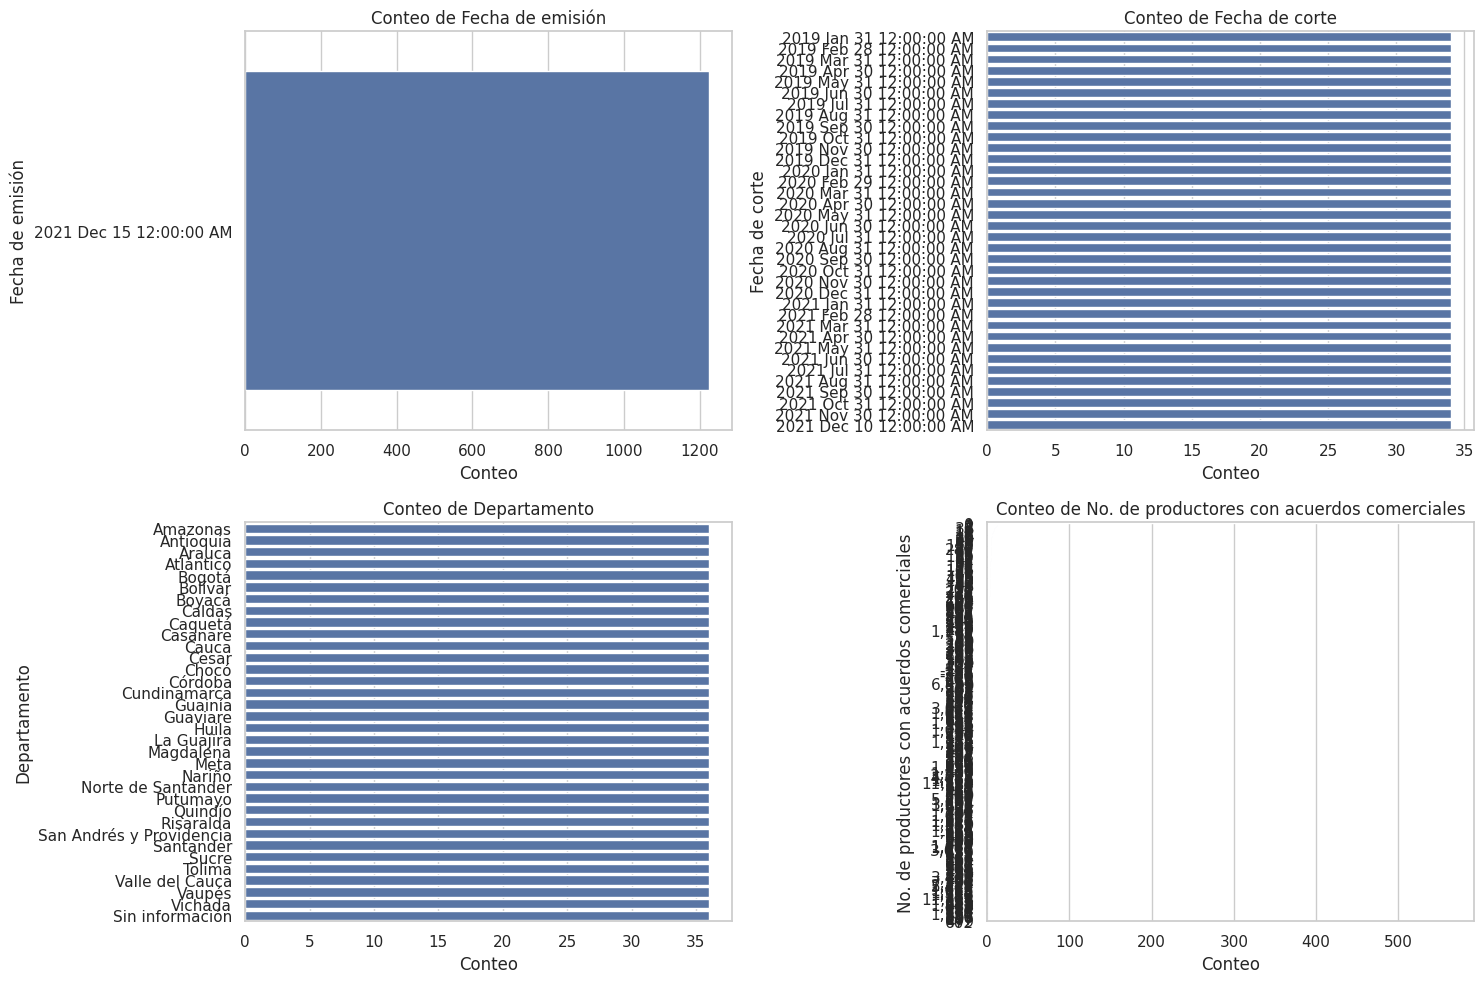

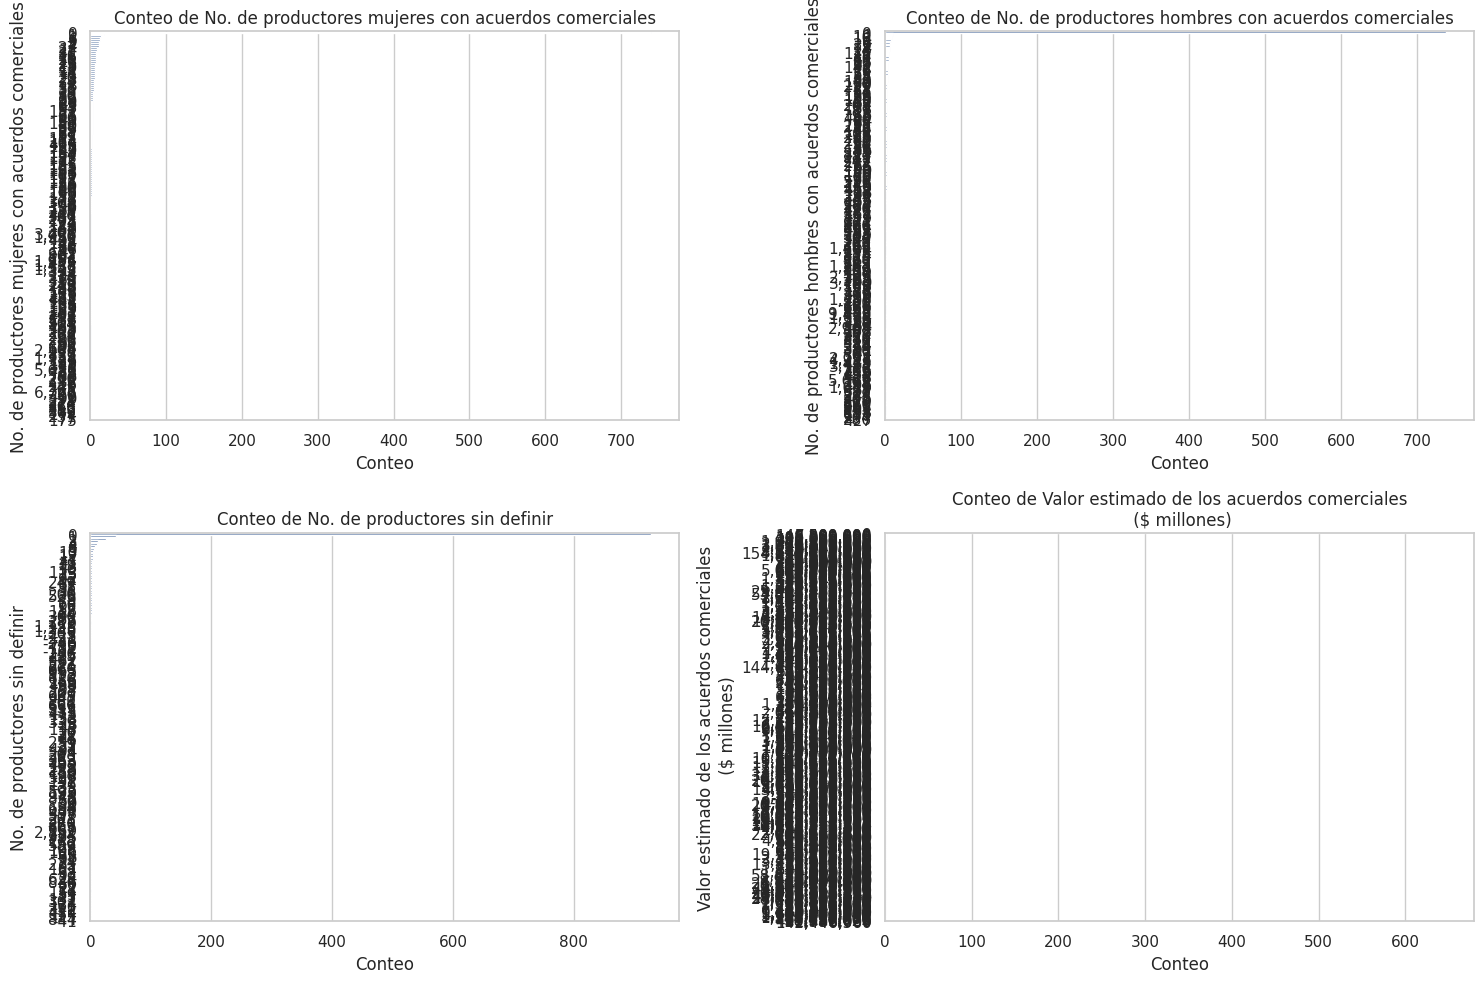

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 3. CARGAR ARCHIVO DESDE GOOGLE DRIVE

df = pd.read_csv('/content/drive/MyDrive/datos/datos.csv')

# 4. EXTRAER VARIABLES CATEGÓRICAS

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas encontradas:\n")
print(categorical_cols)

# 5. GRÁFICAS DE BARRAS DE CONTEO (SEABORN)
num_cols = len(categorical_cols)
rows_per_fig = 2
cols_per_fig = 2 # Display 4 plots per figure (2x2 grid)

for i in range(0, num_cols, rows_per_fig * cols_per_fig):
    fig, axes = plt.subplots(rows_per_fig, cols_per_fig, figsize=(15, 10)) # Adjust figure size for better visibility
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    for j in range(rows_per_fig * cols_per_fig):
        current_col_idx = i + j
        if current_col_idx < num_cols:
            col = categorical_cols[current_col_idx]
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[j])
            axes[j].set_title(f'Conteo de {col}')
            axes[j].set_xlabel('Conteo')
            axes[j].set_ylabel(col)
        else:
            # Remove any empty subplots if the last figure has fewer than 4 plots
            fig.delaxes(axes[j])

    plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
    plt.show()